ДОМАШНЯЯ РАБОТА № 2_1 
Ходыка Анны

In [159]:
! pip install pandas

In [72]:
!pip3 install lxml

In [73]:
!python --version

Python 3.9.7


In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
url_ = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
#population = pd.read_html(url_, attrs={"id": "collapsibleTable6"}) - не парсится
population_list = pd.read_html(url_, match='Коефіцієнт народжуваності в регіонах України')
population=population_list[0]

Вывести первые строки таблицы с помощью метода head

In [162]:
population.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


Определите количество строк и столбцов в датафрейме (атрибут shape)

In [163]:
population.shape

(28, 9)

Замените в таблице значения "—" на значения NaN

In [164]:
population.replace(to_replace="—", value=np.nan, inplace=True)
population

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


In [190]:
ukraine=population.iloc[-1][1:]
ukraine

1950    228.0
1960    205.0
1970    152.0
1990      126
2000       78
2012      114
2014      111
2019       81
Name: 27, dtype: object

ДОБАВЛЯЮ ЛИНИЮ РЕГРЕСИИ КОЄФФИЦИЕНТОВ РОЖДАЕМОСТИ В УКРАИНЕ

In [191]:
ukraine=ukraine.astype('float')
ukraine=list(ukraine)

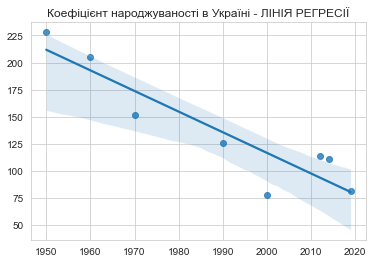

In [196]:
years=[1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019]
sns.regplot(x=years, y=ukraine)
plt.title('Коефіцієнт народжуваності в Україні - ЛІНІЯ РЕГРЕСІЇ')
plt.show()

Определите типы всех столбцов с помощью dataframe.dtypes

In [79]:
population.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [80]:
population['2014']=population['2014'].astype('float64')
population['2019']=population['2019'].astype('float64')
population.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [81]:
population.isnull().sum()/28*100

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [82]:
population=population.drop([population.shape[0]-1])
population

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
9,Київська,204.0,189.0,156.0,123,73,122,121.0,80.0


Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [83]:
#population.fillna({i: population[i].mean() for i in range(population.shape[1]-1)})
values = {}
for i in population.columns:
    if i!='Регіон':
        values[i]=population[i].mean()
population.fillna(values, inplace=True)
population

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.00,206.000000,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.00,192.000000,142.0,124,84,112,109.00,76.000000
2,Волинська,247.00,250.000000,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.00,204.000000,151.0,123,71,112,111.00,71.000000
4,Донецька,271.00,214.000000,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.00,223.000000,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.00,273.000000,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.00,197.000000,150.0,124,71,106,106.00,68.000000
8,Івано-Франківська,243.00,248.000000,182.0,155,103,124,122.00,88.000000
9,Київська,204.00,189.000000,156.0,123,73,122,121.00,80.000000


Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [84]:
population2019 = population[population['2019']>population['2019'].mean()][['Регіон', '2019']]
population2019

,Регіон,2019
2,Волинська,101.0
6,Закарпатська,104.0
8,Івано-Франківська,88.0
12,Львівська,87.0
14,Одеська,88.0
16,Рівненська,107.0
20,Херсонська,81.0
23,Чернівецька,92.0
25,Київ,110.0


В каком регионе была самая высокая рождаемость в 2014 году?

In [114]:
# population['2014'].idxmax() - возвращает индекс максимального значения
population.iloc[population['2014'].idxmax()]['Регіон']

'Рівненська'

Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

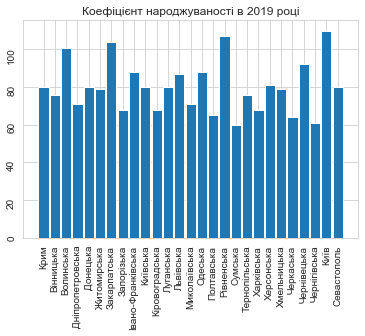

In [155]:
plt.bar(population['Регіон'], population['2019'], width=0.9)
plt.title('Коефіцієнт народжуваності в 2019 році')
plt.tick_params(labelrotation = 90)
plt.show()

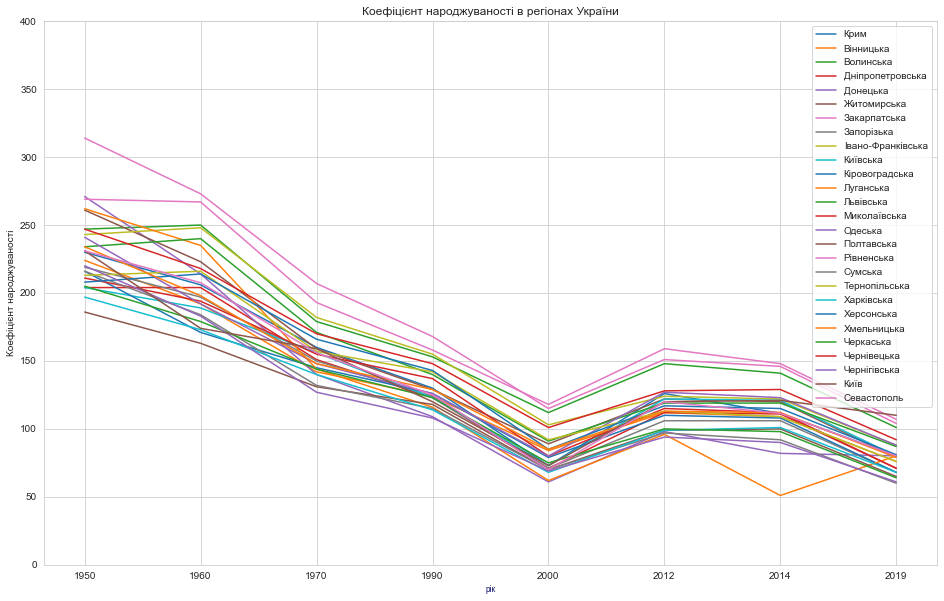

In [125]:
years=population.columns[1:]
plt.figure(figsize=(16, 10))
for i in range(len(population)):
    plt.plot(years, population.iloc[i][1:], label=population.iloc[i][0])
plt.legend(loc='upper right')
plt.xlabel('рік', fontsize='small', color='midnightblue')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Коефіцієнт народжуваності в регіонах України', fontsize=12)
plt.ylim(0, 400)
plt.show()